In [ ]:
"""
Addition on a quantum computer based omaxInputLenght the ripple-carry method.
-Michal Forgó
"""

'\naddition.py: Addition on a quantum computer based omaxInputLenght the\n             ripple-carry method.\n'

In [64]:
# Importing libraries
# Importování knihoven
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

In [65]:
# Getting two binary numbers as input
while True:
    firstBinaryNumber = input("Enter a 7 bit or less binary number")
    secondBinaryNumber = input("Enter another 7 bit or less binary binary number")
    
    # Checking if the length of either number is more than 8 digits
    if len(firstBinaryNumber) > 8 or  len(firstBinaryNumber) > 8:
        print("Please enter valid inputs. Try again.")
    else:
        break


# Finding out which number is larger and assigning
maxInputLenght = max(len(firstBinaryNumber), len(secondBinaryNumber))

In [66]:
'''
Initialising the registers; two quantum registers with n bits each
1 more with n+1 bits, which will also hold the sum of the two numbers
The classical register has n+1 bits, which is used to output the  
final sum
'''

regA = QuantumRegister(maxInputLenght) # First number
regB = QuantumRegister(maxInputLenght + 1) # Second number and sum
regC = QuantumRegister(maxInputLenght) # Carry bits
regD = ClassicalRegister(maxInputLenght + 1) # Final output

# Combining all of them into one quantum circuit
qc = QuantumCircuit(regA, regB, regC, regD)

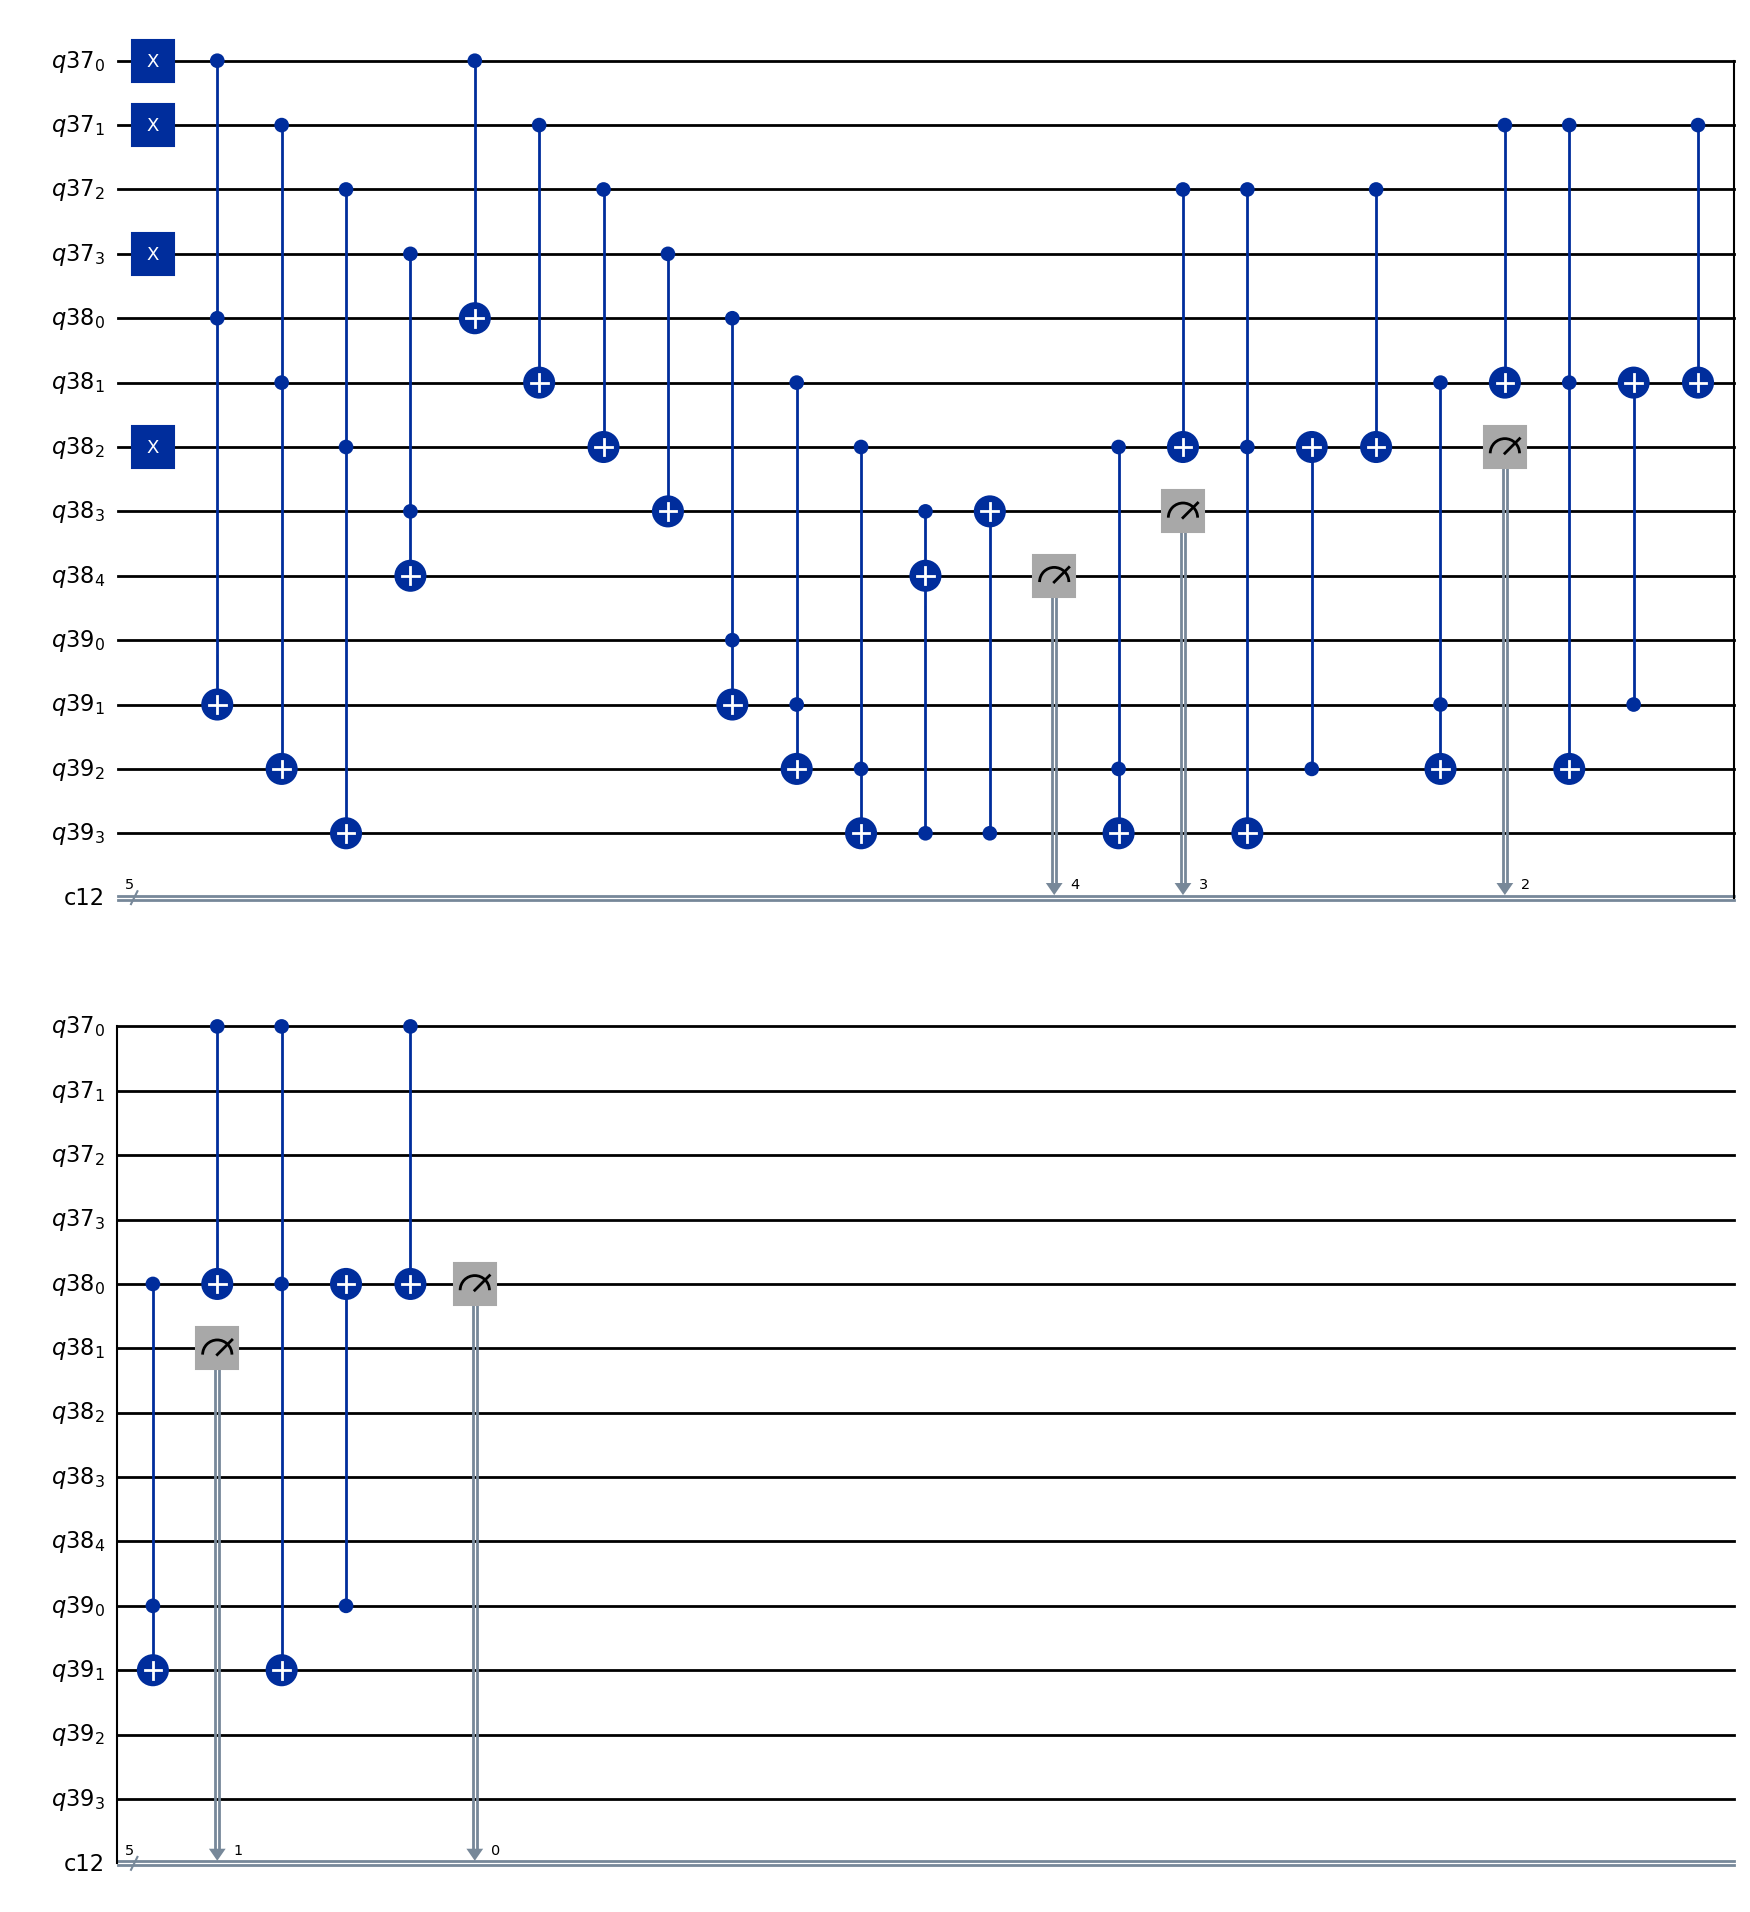

In [67]:
# Setting up the registers a and b to hold the values inputted 
for idx, val in enumerate(firstBinaryNumber):
    if val == "1":
        qc.x(regA[len(firstBinaryNumber) - (idx+1)])

for idx, val in enumerate(secondBinaryNumber):
    if val == "1":
        qc.x(regB[len(secondBinaryNumber) - (idx+1)])

# Implementing a carry gate that is applied on all (regA[i], regB[i], regC[i]) 
# with output fed to regC[i+1]
for i in range(maxInputLenght -1):
    qc.ccx(regA[i], regB[i], regC[i+1])
    qc.cx(regA[i], regB[i])
    qc.ccx(regC[i], regB[i], regC[i+1])

# For the last iteration of the carry gate, instead of feeding the
# result to regC[maxInputLenght], we use regB[maxInputLenght], which is why c has only n bits,
# with regC[maxInputLenght-1] being the last carry bit
qc.ccx(regA[maxInputLenght-1], regB[maxInputLenght-1], regB[maxInputLenght])
qc.cx(regA[maxInputLenght-1], regB[maxInputLenght-1])
qc.ccx(regC[maxInputLenght-1], regB[maxInputLenght-1], regB[maxInputLenght])

# Reversing the gate operation performed on regB[maxInputLenght-1]
qc.cx(regC[maxInputLenght-1], regB[maxInputLenght-1])

# Reversing the gate operations performed during the carry gate
# implementations, which is done to reset all carry bits to 
# the |0> state
for i in range(maxInputLenght -1):
    qc.ccx(regC[(maxInputLenght -2)-i], regB[(maxInputLenght -2)-i], regC[(maxInputLenght -1)-i])
    qc.cx(regA[(maxInputLenght -2)-i], regB[(maxInputLenght -2)-i])
    qc.ccx(regA[(maxInputLenght -2)-i], regB[(maxInputLenght -2)-i], regC[(maxInputLenght -1)-i])
    # These two operations act as a sum gate; if a control bit is 
    # in the |1> state then the target bit regB[(maxInputLenght -2)-i] is flipped
    qc.cx(regC[(maxInputLenght -2)-i], regB[(maxInputLenght -2)-i])
    qc.cx(regA[(maxInputLenght -2)-i], regB[(maxInputLenght -2)-i])

# Measure qubits
for i in range(maxInputLenght +1):
    qc.measure(regB[i], regD[i])

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Quantum Addition')
qc.draw("mpl")